# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
from math import floor
import ast
import json
import re
import numpy as np

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [2]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "cpu_"

In [3]:
def get_workload(code):
    """
    Returns the workload data of an experiment given by its code.

    This function reads the 'queries.config' file associated with the specified experiment code,
    parses its contents, and returns the workload properties as a dictionary.

    :param code: The unique identifier of the experiment.
    :type code: str
    :return: A dictionary containing the workload properties.
    :rtype: dict
    """
    with open(path+"/"+code+"/queries.config",'r') as inp:
        workload_properties = ast.literal_eval(inp.read())
        return workload_properties


def get_performance_single(evaluation):
    """
    Reads the performance metrics and returns them without any aggregation across clients.

    This function retrieves benchmarking data from the given evaluation object,
    sorts it by experiment run and client, and returns the resulting DataFrame.

    :param evaluation: The evaluation object containing benchmarking data.
    :type evaluation: object
    :return: A DataFrame containing unaggregated performance metrics per client.
    :rtype: pandas.DataFrame
    """
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    return df

    
def get_performance(evaluation):
    """
    Reads and aggregates the performance metrics across clients.

    This function retrieves benchmarking data from the given evaluation object,
    sorts it by experiment run and client, and performs aggregation by client.
    It sums throughput and error counts, calculates the mean average latency, 
    and determines the maximum 99th percentile latency per client.

    :param evaluation: The evaluation object containing benchmarking data.
    :type evaluation: object
    :return: A DataFrame with aggregated performance metrics per client.
    :rtype: pandas.DataFrame
    """
    df = get_performance_single(evaluation)
    result = df.groupby('client').agg({
        'Goodput (requests/second)': 'sum',
        'num_errors': 'sum',
        'Latency Distribution.Average Latency (microseconds)': 'mean',
        'Latency Distribution.99th Percentile Latency (microseconds)': 'max',
    }).reset_index()
    return result


def get_performance_all(codes):
    """
    Loops over multiple experiments and combines their aggregated performance results into a single DataFrame.

    For each experiment code, this function:
    - Initializes a benchmarking evaluator
    - Retrieves the corresponding workload configuration
    - Extracts aggregated performance metrics per client
    - Annotates the results with workload metadata (`type` and `num_tenants`)
    - Concatenates the results into a single DataFrame

    :param codes: A list of experiment identifiers to process.
    :type codes: list[str]
    :return: A combined DataFrame containing aggregated performance metrics for all experiments.
    :rtype: pandas.DataFrame
    """
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance


def get_performance_all_single(codes):
    """
    Loops over multiple experiments and combines their unaggregated performance results into a single DataFrame.

    For each experiment code, this function:
    - Initializes a benchmarking evaluator
    - Retrieves the corresponding workload configuration
    - Extracts unaggregated performance metrics per client
    - Annotates the results with workload metadata (`type` and `num_tenants`)
    - Concatenates the results into a single DataFrame

    :param codes: A list of experiment identifiers to process.
    :type codes: list[str]
    :return: A combined DataFrame containing unaggregated performance metrics for all experiments.
    :rtype: pandas.DataFrame
    """
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance_single(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance


def get_metrics(evaluation):
    """
    Returns information about hardware metrics that were collected during the experiment.

    This function reads the `connections.config` file associated with the given evaluation,
    extracts and organizes the monitored hardware metrics, and returns them in a structured DataFrame.

    The resulting DataFrame includes, for each metric:
    - `title`: A descriptive name
    - `active`: Whether the metric was active during monitoring
    - `type`: The type/category of the metric (e.g., 'cluster')
    - `metric`: The raw metric name or identifier

    :param evaluation: The evaluation object containing the experiment code.
    :type evaluation: object
    :return: A DataFrame listing hardware metrics and their metadata.
    :rtype: pandas.DataFrame
    """
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            for m, metric in c['monitoring']['metrics'].items():
                if m in result:
                    continue
                result[m] = {
                    'title': metric['title'],
                    'active': metric['active'] if 'active' in metric else 'True',
                    'type': metric['type'] if 'type' in metric else 'cluster',
                    'metric': metric['metric'] if 'metric' in metric else '',
                }
        df = pd.DataFrame(result).T
        return df


def get_loading_time_max(evaluation):
    """
    Collects information about the loading processes from the experiment configuration.

    This function reads the `connections.config` file associated with the given evaluation,
    extracts metadata related to data loading operations for each connection, and returns
    the results as a DataFrame.

    The resulting DataFrame includes, for each connection:
    - `time_load`: Total time taken for the load phase
    - `time_ingest`: Time spent ingesting data
    - `time_check`: Time spent indexing or verifying the data
    - `terminals`: Number of BenchBase terminals used
    - `pods`: Degree of parallelism (e.g., number of pods or workers)
    - `tenant`: Tenant identifier (if applicable)
    - `client`: Client name or identifier
    - `datadisk`: Size of the data disk used on the host system (in MB)

    :param evaluation: The evaluation object containing the experiment code.
    :type evaluation: object
    :return: A DataFrame with loading-related metrics and parameters for each connection.
    :rtype: pandas.DataFrame
    """
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            result[c['name']] = {
                'time_load': c['timeLoad'],
                'time_ingest': c['timeIngesting'],
                'time_check': c['timeIndex'],
                'terminals': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS'],
                'pods': c['parameter']['parallelism'],
                'tenant': c['parameter']['TENANT'] if 'TENANT' in c['parameter'] else '',
                'client': c['parameter']['client'],
                'datadisk': c['hostsystem']['datadisk'],
            }
        df = pd.DataFrame(result).T
        return df


def get_loading_time_max_all(codes):
    """
    Collects loading process information for a list of experiments and combines the results into a single DataFrame.

    For each experiment code in the input list, this function:
    - Initializes a benchmarking evaluator
    - Retrieves workload metadata
    - Extracts loading-related metrics for each connection
    - Annotates the data with workload attributes (`type`, `num_tenants`)
    - Appends the result to a cumulative DataFrame

    The resulting DataFrame provides a consolidated view of the loading phase across multiple experiments,
    including timings, configuration parameters, and hardware context.

    :param codes: A list of experiment identifiers to process.
    :type codes: list[str]
    :return: A combined DataFrame containing loading metrics and metadata for all experiments.
    :rtype: pandas.DataFrame
    """
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_loading_time_max(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

    
def show_summary_monitoring_table_old(evaluate, component):
    df_metrics = get_metrics(evaluate) # not used by now
    #print(df_metrics)
    df_monitoring = list()
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util_s', component=component)
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    #df = df.T.max().sort_index() - df.T.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU [CPUs]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_throttled', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU Throttled"]
    #print(df_cleaned)
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max CPU"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df).round(2)
    df_cleaned.columns = ["Max RAM [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory_cached', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max RAM Cached [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Locks"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_active', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Active"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction_aborted', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Aborted"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Hits"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Reads"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Reads"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Hits"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_sync_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Sync Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_write_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Write Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='cache_hit_ratio', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Cache Hit Ratio [%]"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autoanalyze_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autoanalyze"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autovacuum_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autovacuum"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    return df_monitoring


def show_summary_monitoring_table(evaluate, component):
    """
    Collects hardware and application monitoring metrics for a specified component without aggregation.

    This function retrieves multiple monitoring metrics from the evaluation object related to
    CPU usage, memory, PostgreSQL activity, cache statistics, and background writer performance.
    Each metric is processed (e.g., max-min differences, means, or max values) and combined into a single DataFrame.

    :param evaluate: The evaluation object containing monitoring data and methods to retrieve metrics.
    :type evaluate: object
    :param component: The component name for which to retrieve metrics (e.g., 'database', 'worker').
    :type component: str
    :return: A DataFrame combining all monitored metrics indexed by monitored entities.
    :rtype: pandas.DataFrame
    """
    # Define metrics with the processing method and resulting column name
    metrics_info = [
        ('total_cpu_util_s', 'diff', 'CPU [CPUs]'),
        ('total_cpu_throttled', 'max', 'CPU Throttled'),
        ('total_cpu_util', 'max', 'Max CPU'),
        ('total_cpu_memory', 'max', 'Max RAM [Gb]', 1024),
        ('total_cpu_memory_cached', 'max', 'Max RAM Cached [Gb]', 1024),
        ('pg_locks_count', 'mean', 'Locks'),
        ('pg_stat_activity_count_active', 'mean', 'Active'),
        ('pg_stat_activity_count_idle', 'mean', 'Idle'),
        ('pg_stat_activity_count_idle_transaction', 'mean', 'Transactions Idle'),
        ('pg_stat_activity_count_idle_transaction_aborted', 'max', 'Transactions Aborted'),
        ('pg_stat_database_blks_hit', 'diff', 'Block Hits'),
        ('pg_stat_database_blks_read', 'diff', 'Block Reads'),
        ('pg_statio_user_tables_heap_blocks_read', 'diff', 'Heap Reads'),
        ('pg_statio_user_tables_heap_blocks_hit', 'diff', 'Heap Hits'),
        ('pg_stat_bgwriter_checkpoint_sync_time_total', 'diff', 'Sync Time'),
        ('pg_stat_bgwriter_checkpoint_write_time_total', 'diff', 'Write Time'),
        ('cache_hit_ratio', 'mean', 'Cache Hit Ratio [%]', 100.0),
        ('pg_stat_user_tables_autoanalyze_count', 'diff', 'Number Autoanalyze', 100.0),
        ('pg_stat_user_tables_autovacuum_count', 'diff', 'Number Autovacuum', 100.0),
    ]
    results = []
    for metric in metrics_info:
        metric_name = metric[0]
        method = metric[1]
        col_name = metric[2]
        scale = metric[3] if len(metric) > 3 else 1
        df = evaluate.get_monitoring_metric(metric=metric_name, component=component)
        # Apply scaling if needed
        if scale != 1:
            df = df * scale
        # Process dataframe according to method
        if method == 'diff':
            processed = df.max().sort_index() - df.min().sort_index()
        elif method == 'max':
            processed = df.max().sort_index()
        elif method == 'mean':
            processed = df.mean().sort_index()
        else:
            raise ValueError(f"Unknown processing method: {method}")
        df_cleaned = pd.DataFrame(processed)
        df_cleaned.columns = [col_name]
        results.append(df_cleaned)
    # Combine all dataframes horizontally (join on index)
    summary_df = pd.concat(results, axis=1).round(2)
    summary_df = summary_df.reindex(index=evaluators.natural_sort(summary_df.index))
    return summary_df

def get_monitoring_timeseries_single(code, metric='pg_locks_count', component="stream"):
    """
    Retrieves a single monitoring metric as a time series DataFrame for a given experiment code and component.

    The function initializes the evaluation object for the specified experiment,
    then fetches the time series data for the specified metric and component.

    :param code: The experiment identifier code.
    :type code: str
    :param metric: The name of the monitoring metric to retrieve (default is 'pg_locks_count').
    :type metric: str, optional
    :param component: The component name to filter metrics (default is 'stream').
    :type component: str, optional
    :return: A DataFrame containing the time series of the requested metric indexed by timestamps or monitoring targets.
    :rtype: pandas.DataFrame
    """
    evaluate = evaluators.benchbase(code=code, path=path)
    df = evaluate.get_monitoring_metric(metric=metric, component=component)
    return df


def get_monitoring(evaluation, type="stream"):
    """
    Retrieves and aggregates monitoring metrics for a specified component type, grouped by client.

    This function obtains detailed monitoring data using `show_summary_monitoring_table` for the
    specified component type (default "stream"). It adds a 'client' column extracted from the DataFrame index,
    then aggregates various hardware and application metrics by client using sum or mean as appropriate.

    :param evaluation: The evaluation object containing monitoring data.
    :type evaluation: object
    :param type: The component type to filter monitoring metrics (default is "stream").
    :type type: str, optional
    :return: A DataFrame with aggregated monitoring metrics grouped by client. If no data is available, returns None.
    :rtype: pandas.DataFrame or None
    """
    df_monitoring = show_summary_monitoring_table(evaluation, type)
    if len(df_monitoring) > 0:
        df = df_monitoring.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        result = df.groupby('client').agg({
            'CPU [CPUs]': 'sum',
            'Max RAM [Gb]': 'sum',
            'Max RAM Cached [Gb]': 'sum',
            'Max CPU': 'sum',
            'CPU Throttled': 'sum',
            'Locks': 'sum',
            'Active': 'sum',
            'Idle': 'sum',
            'Transactions Idle': 'sum',
            'Transactions Aborted': 'sum',
            'Block Hits': 'sum',
            'Block Reads': 'sum',
            'Heap Reads': 'sum',
            'Heap Hits': 'sum',
            'Sync Time': 'sum',
            'Write Time': 'sum',
            'Number Autoanalyze': 'sum',
            'Number Autovacuum': 'sum',
            'Cache Hit Ratio [%]': 'mean',
        }).reset_index()
        return result


def get_monitoring_all(codes, type="stream"):
    """
    Aggregates monitoring metrics across multiple experiments for a specified component type.

    For each experiment code provided, this function:
    - Initializes the evaluation object,
    - Retrieves workload metadata,
    - Collects aggregated monitoring metrics for the specified component type,
    - Adds workload-related metadata columns ('type' and 'num_tenants'),
    - Concatenates the results into a single DataFrame.

    :param codes: A list of experiment codes to process.
    :type codes: list of str
    :param type: The component type to filter monitoring metrics (default is "stream").
    :type type: str, optional
    :return: A concatenated DataFrame containing aggregated monitoring metrics for all experiments,
             enriched with workload metadata.
    :rtype: pandas.DataFrame
    """
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_monitoring(evaluation, type)
        df['type'] = workload['tenant_per']
        df['num_tenants'] = workload['num_tenants']
        df_performance = pd.concat([df_performance, df])
    return df_performance


def get_monitoring_single_all(codes, type="stream"):
    """
    Retrieves non-aggregated monitoring metrics for multiple experiments and combines them into a single DataFrame.

    For each experiment code, this function:
    - Initializes the evaluation object,
    - Retrieves workload metadata,
    - Collects detailed monitoring metrics for the specified component type without aggregation across clients,
    - Adds workload-related metadata columns ('type' and 'num_tenants'),
    - Concatenates the results into a single DataFrame.

    :param codes: A list of experiment codes to process.
    :type codes: list of str
    :param type: The component type to filter monitoring metrics (default is "stream").
    :type type: str, optional
    :return: A DataFrame containing detailed (non-aggregated) monitoring metrics for all experiments,
             enriched with workload metadata.
    :rtype: pandas.DataFrame
    """
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df_monitoring = show_summary_monitoring_table(evaluation, type)
        if len(df_monitoring) > 0:
            df = df_monitoring.copy()  # avoid modifying original
            df['client'] = df.index.str.rsplit('-', n=1).str[-1]
            df['type'] = workload['tenant_per']
            df['num_tenants'] = workload['num_tenants']
            df_performance = pd.concat([df_performance, df])
    return df_performance



In [4]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



In [5]:
def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Results

In [6]:
codes = [
    # container
    '1753132616', #tenants=1
    '1753122190', #tenants=2
    '1753162133', #tenants=3
    #'1752572699', #tenants=9
    #'1752464472', #tenants=10

    # database
    '1753130778', #tenants=1
    '1753119695', #tenants=2
    '1753142257', #tenants=3
    #'1752568918', #tenants=9
    #'1752464472', #tenants=10

    #schema
    '1753128980', #tenants=1
    '1753134411', #tenants=2
    '1753140220', #tenants=3
    #'1752565302', #tenants=9
    #'1752537927', #tenants=10

]

codes = [
    "1753172576", "1753174133", 
    "1753175664", "1753177220",
    "1753179015", "1753180817", "1753182634", "1753183951",
    "1753185883", "1753187528", "1753189629", "1753191732",
    "1753193849", "1753196023", "1753198218",
    "1753200318", "1753202023", "1753203735", "1753205992", "1753208418",
    "1753211049", "1753213398", "1753215965", "1753218707",
    #"1753221149", "1753222536", "1753223878", "1753226500", "1753227837"
]

codes = ["1753277819",
"1753279518",
"1753281247",
"1753282948",
"1753284808",
"1753286610",
"1753288480",
"1753290475",
"1753292344",
"1753294275",
"1753296266",
"1753298355",
"1753300385",
"1753302473",
"1753304605",
"1753306706",
"1753308797",
"1753310896",
"1753313115",
"1753315334",
"1753317513",
"1753319860",
"1753321584",
"1753324378",
"1753326800",
"1753329375",
"1753331918",
"1753334504",
"1753337410",
"1753340173"]

codes

['1753277819',
 '1753279518',
 '1753281247',
 '1753282948',
 '1753284808',
 '1753286610',
 '1753288480',
 '1753290475',
 '1753292344',
 '1753294275',
 '1753296266',
 '1753298355',
 '1753300385',
 '1753302473',
 '1753304605',
 '1753306706',
 '1753308797',
 '1753310896',
 '1753313115',
 '1753315334',
 '1753317513',
 '1753319860',
 '1753321584',
 '1753324378',
 '1753326800',
 '1753329375',
 '1753331918',
 '1753334504',
 '1753337410',
 '1753340173']

<Axes: >

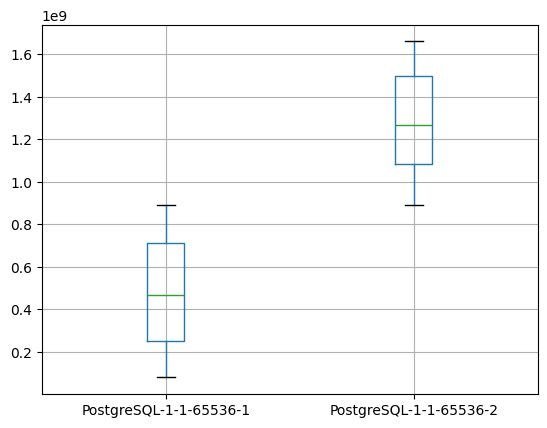

In [7]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()


<Axes: title={'center': 'pg_stat_activity_count_idle_transaction'}>

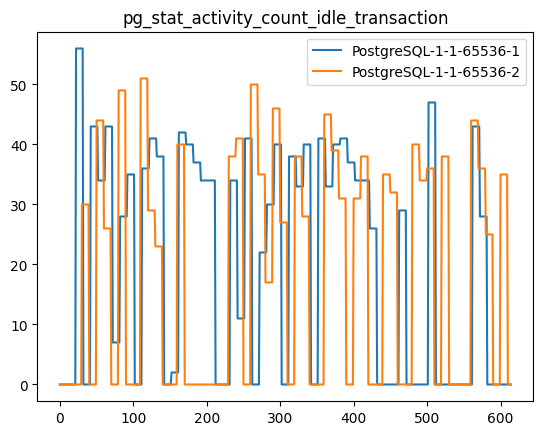

In [8]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)


In [9]:
df_performance = get_monitoring_single_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance[['Max CPU', 'client', 'type', 'num_tenants']]

,Max CPU,client,type,num_tenants
PostgreSQL-1-1-65536-1,22.59,1,schema,1
PostgreSQL-1-1-65536-2,21.79,2,schema,1
PostgreSQL-1-1-65536-1,20.21,1,database,1
PostgreSQL-1-1-65536-2,16.82,2,database,1
PostgreSQL-1-1-65536-0-1,19.80,1,container,1
PostgreSQL-1-1-65536-0-2,20.37,2,container,1
PostgreSQL-1-1-65536-1,23.27,1,schema,2
PostgreSQL-1-1-65536-2,20.35,2,schema,2
PostgreSQL-1-1-65536-1,24.07,1,database,2
PostgreSQL-1-1-65536-2,22.40,2,database,2


In [10]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance#[['Max CPU', 'client', 'type', 'num_tenants']]

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Active,Idle,Transactions Idle,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,10805.14,10730164.0,22449648.0,22.59,0.0,982.78,79.50,0.98,20.68,...,43.0,28.0,4.342091e+08,0.0,0.0,14400.0,11200.0,100.000000,schema,1
1,2,9690.51,13095664.0,25864624.0,21.79,0.0,1023.93,81.63,1.32,18.72,...,18.0,18.0,4.019194e+08,0.0,0.0,12500.0,9700.0,100.000000,schema,1
0,1,9819.37,10349676.0,20599372.0,20.21,0.0,1004.82,90.26,1.74,24.28,...,35.0,35.0,3.875493e+08,0.0,0.0,14300.0,11300.0,100.000000,database,1
1,2,9139.90,12863780.0,27182924.0,16.82,0.0,1012.65,89.93,2.03,28.37,...,21.0,21.0,4.004123e+08,0.0,0.0,12500.0,9900.0,100.000000,database,1
0,1,10252.49,10770648.0,21501984.0,19.80,0.0,1001.89,74.20,1.62,25.45,...,60.0,45.0,4.448802e+08,0.0,0.0,14600.0,11100.0,100.000000,container,1
1,2,9472.46,13278384.0,25398064.0,20.37,0.0,991.26,66.01,1.72,33.78,...,17.0,17.0,4.207788e+08,0.0,0.0,12100.0,9800.0,100.000000,container,1
0,1,10968.99,13628292.0,28978424.0,23.27,0.0,2057.04,157.23,1.90,42.35,...,75.0,65.0,3.958634e+08,0.0,0.0,24500.0,18800.0,100.000000,schema,2
1,2,8816.80,15665852.0,31676932.0,20.35,0.0,1945.52,170.58,1.70,30.04,...,20.0,20.0,3.386201e+08,0.0,0.0,19900.0,16700.0,100.000000,schema,2
0,1,12663.66,13872180.0,31185264.0,24.07,0.0,1998.28,175.18,5.70,60.18,...,46.0,46.0,4.531939e+08,0.0,0.0,27000.0,20500.0,100.000000,database,2
1,2,8457.31,16089720.0,31833088.0,22.40,0.0,1965.24,192.31,5.28,46.47,...,13.0,72.0,8.584006e+08,0.0,0.0,52300.0,41500.0,100.000000,database,2


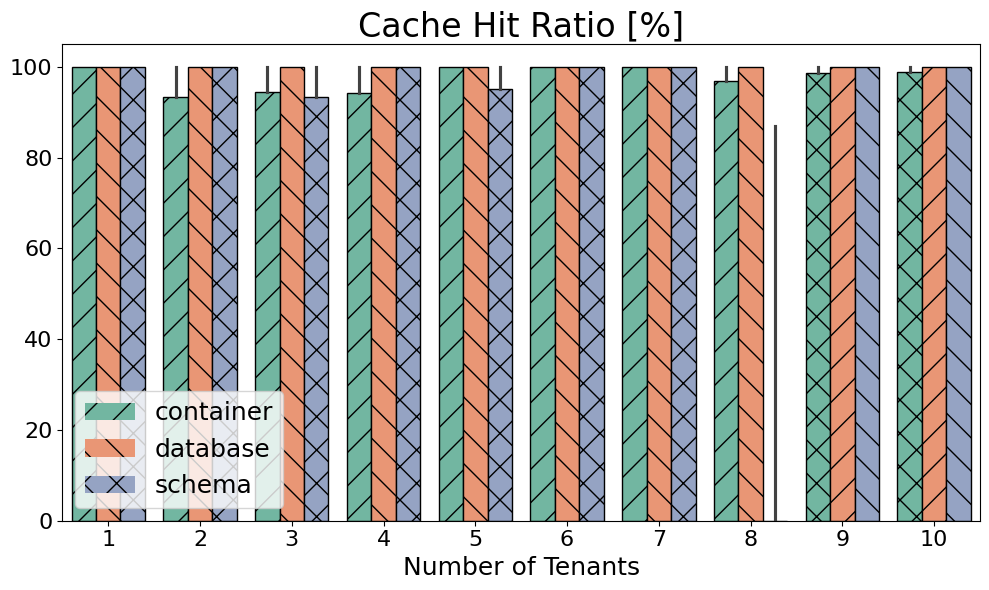

In [11]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

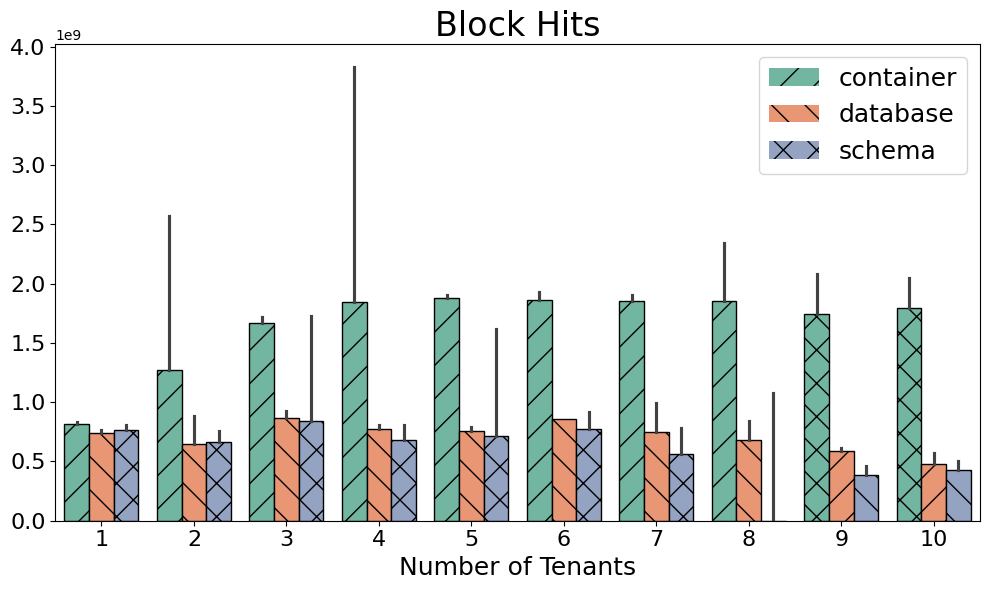

In [12]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

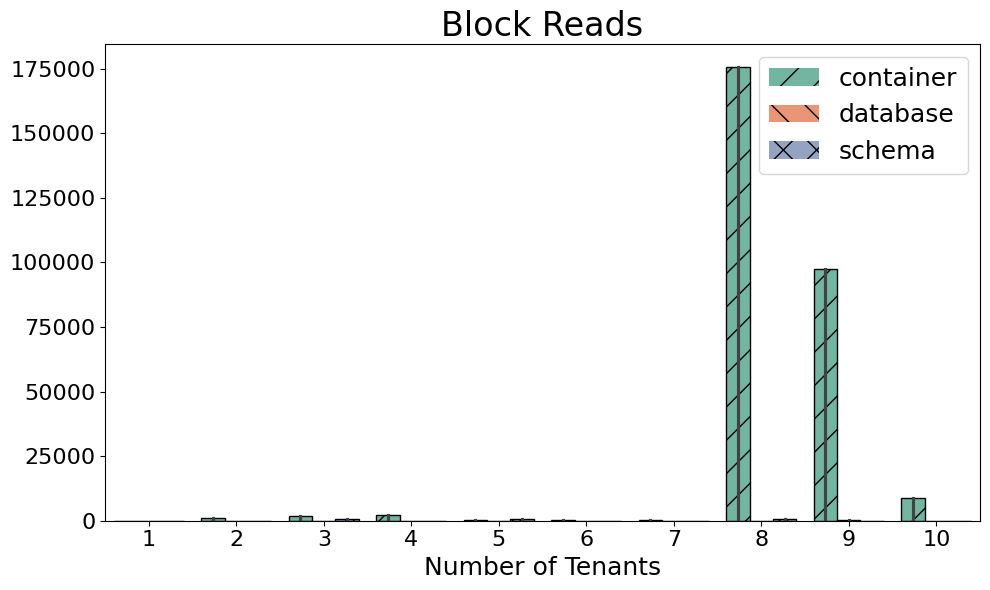

In [13]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Block Reads', title='Block Reads')
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

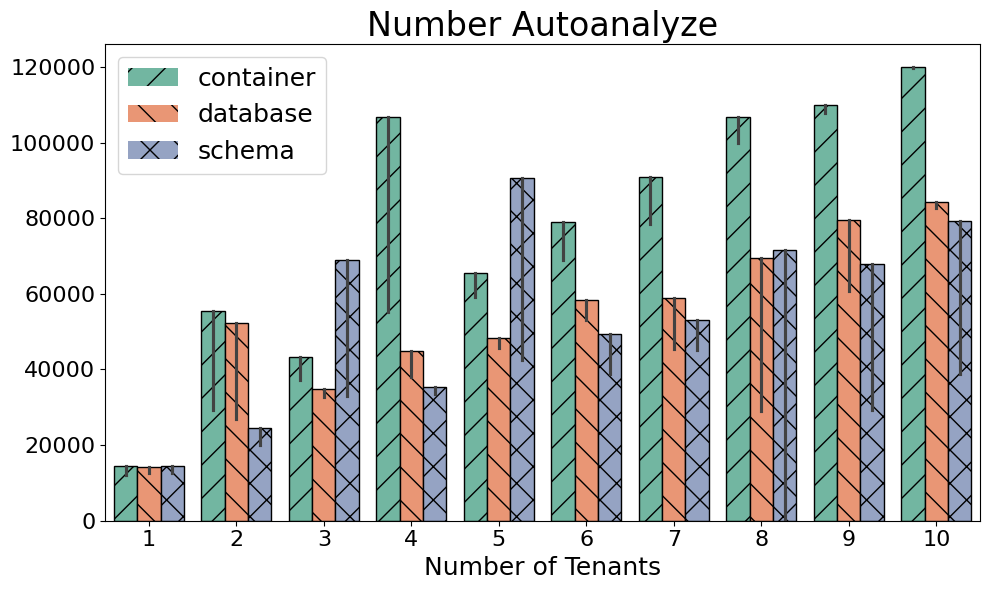

In [14]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

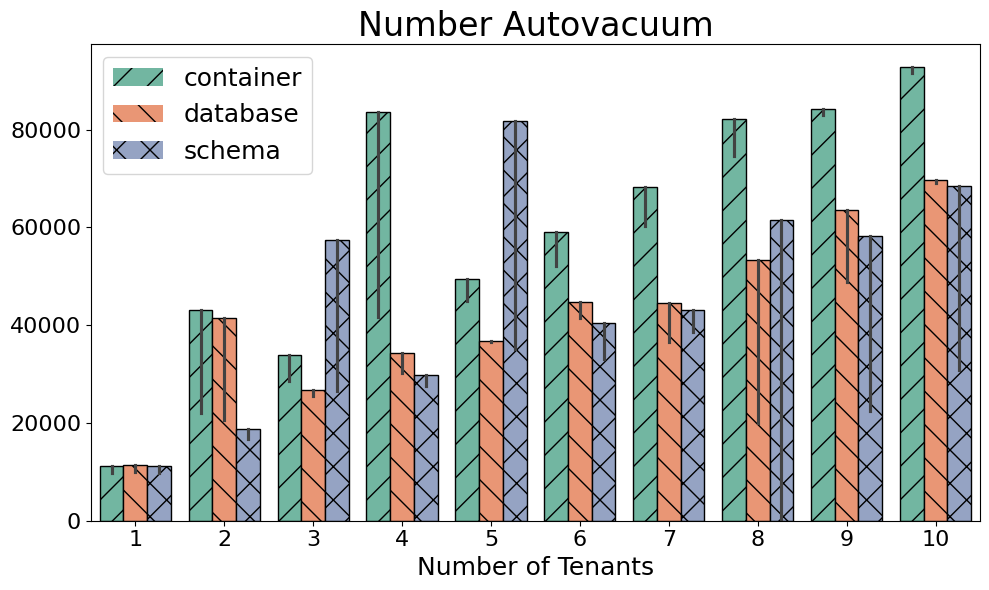

In [15]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

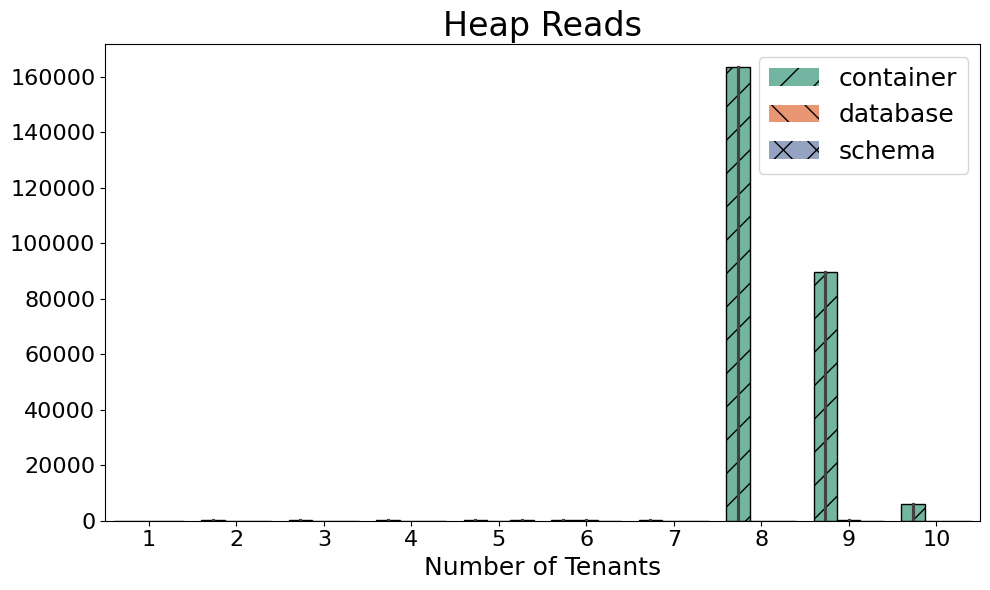

In [16]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

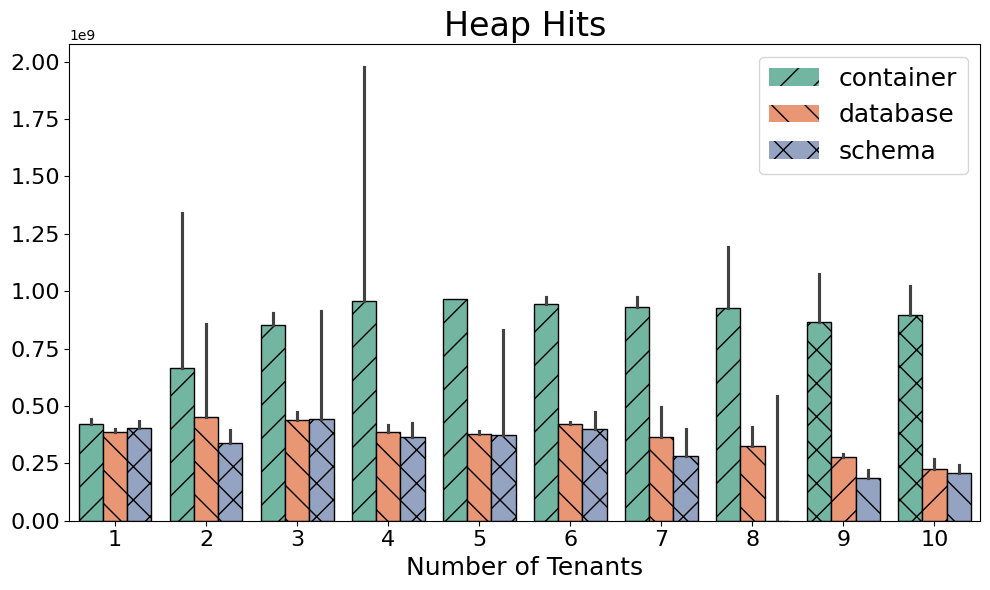

In [17]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

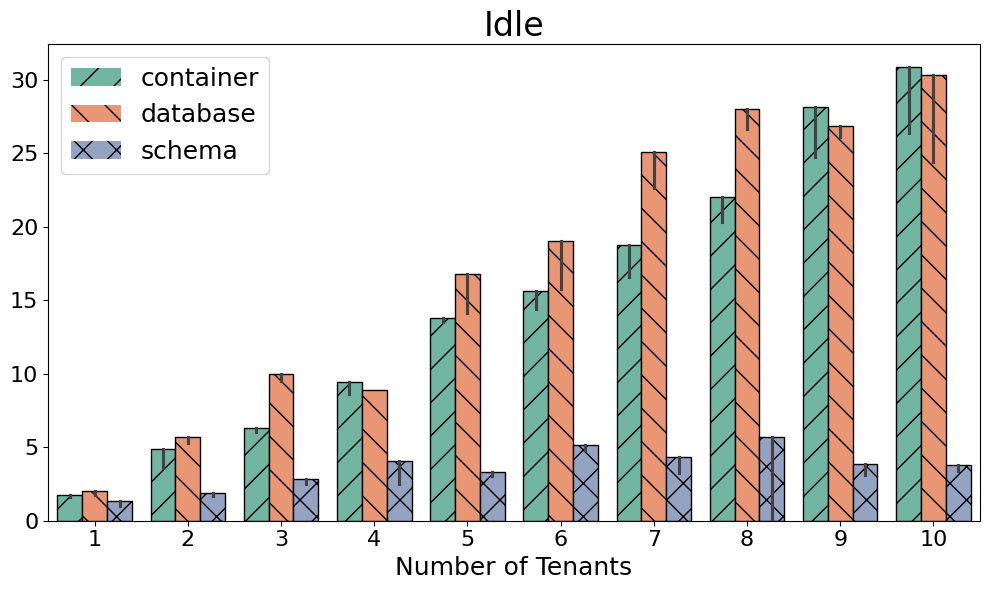

In [18]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Idle', title='Idle')
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

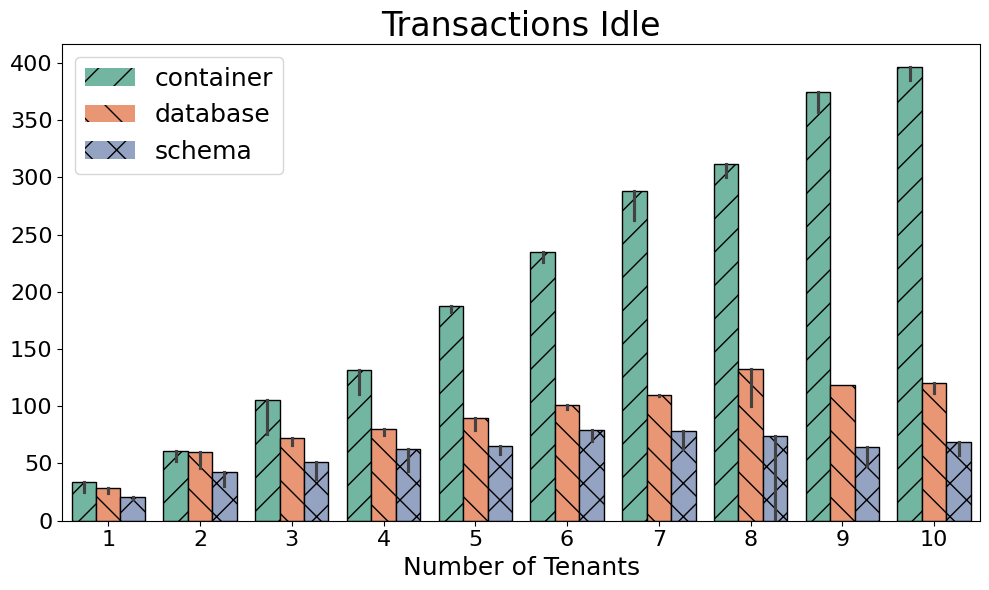

In [19]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Idle', title='Transactions Idle')
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

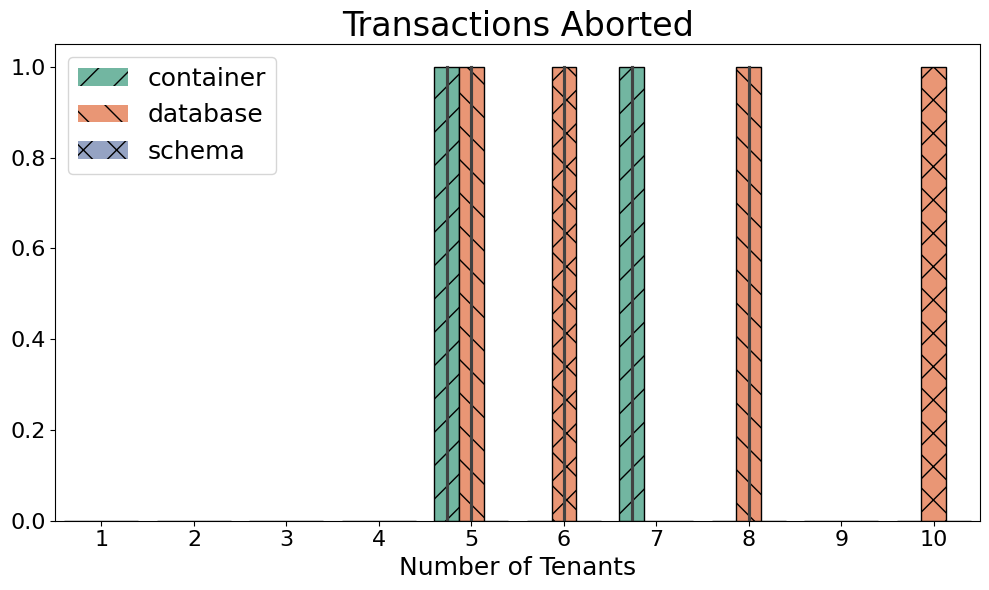

In [20]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Aborted', title='Transactions Aborted')
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

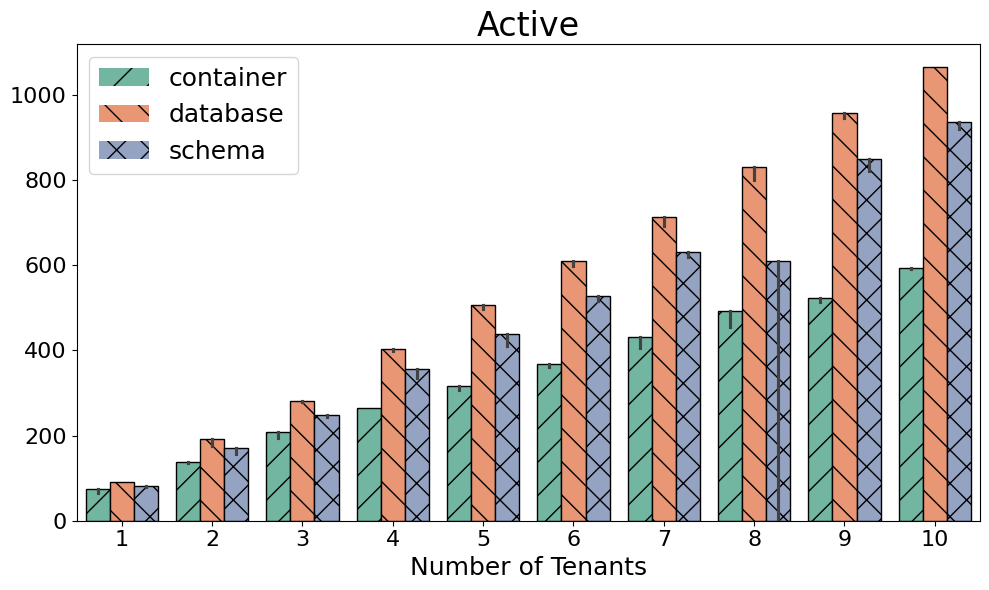

In [21]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Active', title='Active')
plot_bars(df_performance, y='Active', title='Active', estimator='max')

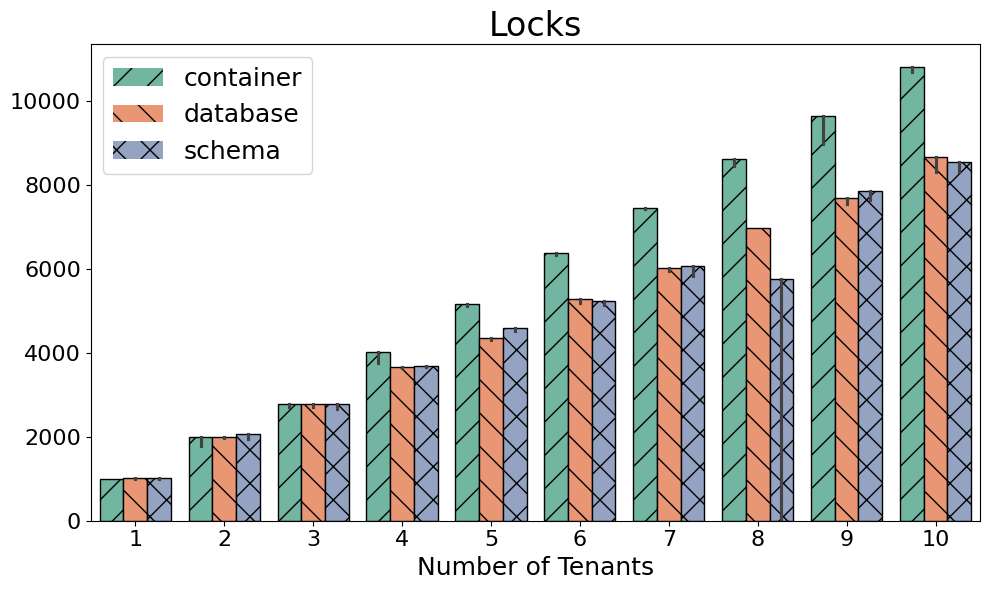

In [22]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

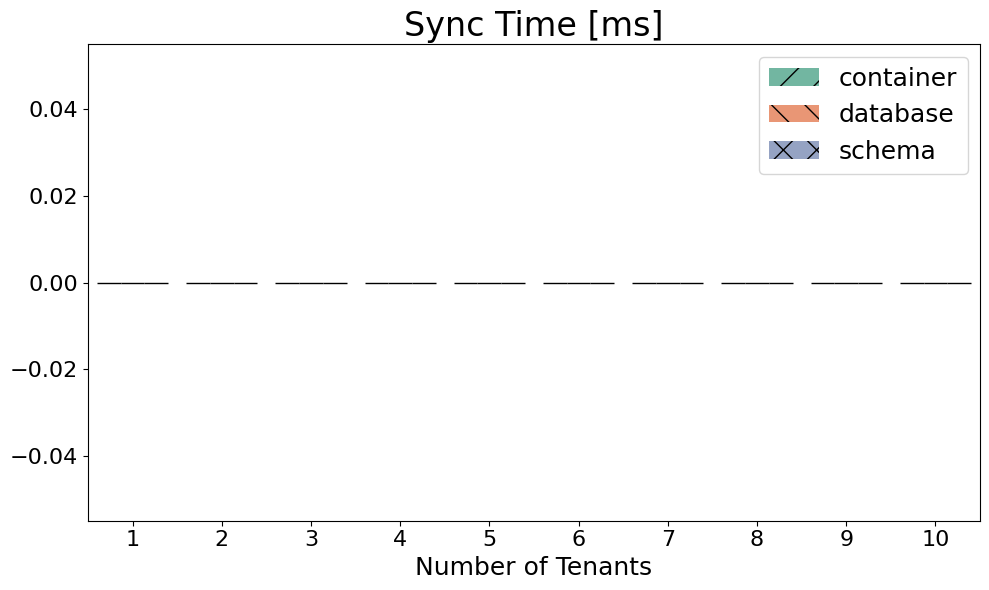

In [23]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Sync Time', title='Sync Time [ms]')
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

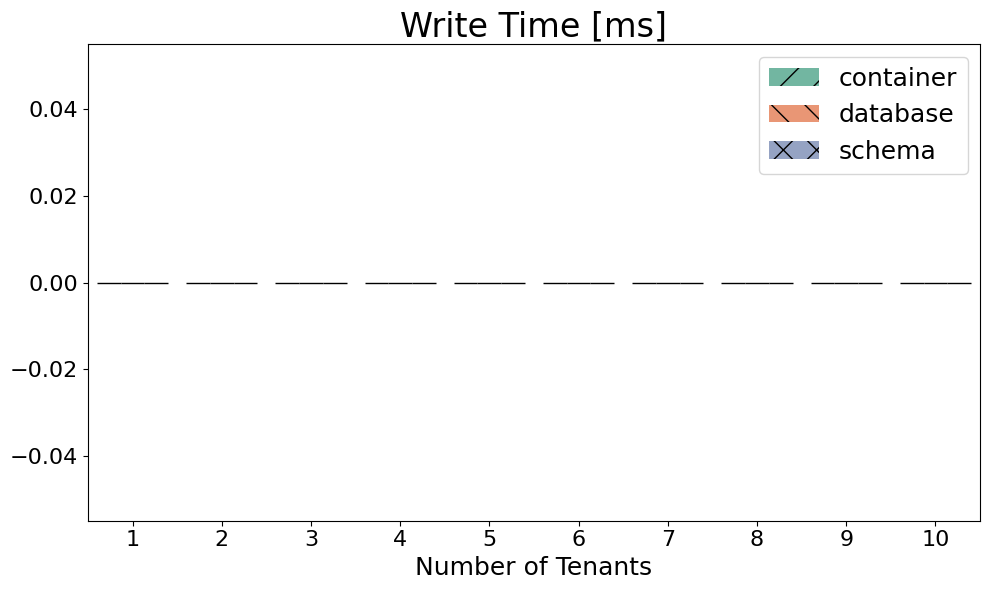

In [24]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

In [25]:
df_performance = get_performance_all_single(codes)
df_performance

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds),type,num_tenants
connection_pod,,,,,,,,,,,,,,,,,,,,,
PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,PostgreSQL-1-1-65536,1,1,s8hfr.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2123026.0,11426.0,645.0,7666.0,26859.0,315305.0,17289.0,21112.0,schema,1
PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,PostgreSQL-1-1-65536,1,2,fcpc9.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2550631.0,11427.0,608.0,7678.0,27022.0,349270.0,17277.0,22195.0,schema,1
PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,PostgreSQL-1-1-65536,1,1,kcmlx.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3425461.0,11301.0,644.0,7577.0,26892.0,359374.0,17188.0,22579.0,database,1
PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,PostgreSQL-1-1-65536,1,2,xpw6v.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3169748.0,11607.0,662.0,7896.0,26709.0,333160.0,17212.0,22306.0,database,1
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,z8rfn.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2750635.0,11981.0,633.0,8020.0,27392.0,227816.0,18284.0,20447.0,container,1
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,zk299.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2939509.0,11902.0,585.0,8007.0,27155.0,223895.0,18235.0,20555.0,container,1
PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,PostgreSQL-1-1-65536,1,1,z55bh.dbmsbenchmarker,2,tpcc,postgres,65536,600,...,4790160.0,15980.0,650.0,10168.0,53637.0,711217.0,27611.0,42993.0,schema,2
PostgreSQL-1-1-65536-1-2,PostgreSQL-1-1-65536-1,PostgreSQL-1-1-65536,1,1,npkfl.dbmsbenchmarker,2,tpcc,postgres,65536,600,...,3905926.0,16467.0,614.0,10435.0,54470.0,706787.0,28832.0,43359.0,schema,2
PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,PostgreSQL-1-1-65536,1,2,7nxgg.dbmsbenchmarker,2,tpcc,postgres,65536,600,...,5042192.0,17429.0,674.0,11212.0,50179.0,904766.0,28304.0,49284.0,schema,2


## Per Tenant

In [26]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
df.dropna()
df['Goodput (requests/second)']

connection_pod
PostgreSQL-1-1-65536-1-1      4651.953220
PostgreSQL-1-1-65536-1-1      4349.368288
PostgreSQL-1-1-65536-0-1-1    4803.003214
PostgreSQL-1-1-65536-1-1      2284.589806
PostgreSQL-1-1-65536-1-2      2266.304838
PostgreSQL-1-1-65536-1-1      2729.826415
PostgreSQL-1-1-65536-1-2      2628.444985
PostgreSQL-1-1-65536-1-1-1    3741.483234
PostgreSQL-1-1-65536-0-1-1    3821.884751
PostgreSQL-1-1-65536-1-1      1636.923214
PostgreSQL-1-1-65536-1-2      1632.853206
PostgreSQL-1-1-65536-1-3      1661.476656
PostgreSQL-1-1-65536-1-1      1776.748191
PostgreSQL-1-1-65536-1-2      1769.684833
PostgreSQL-1-1-65536-1-3      1800.561523
PostgreSQL-1-1-65536-1-1-1    3143.246398
PostgreSQL-1-1-65536-0-1-1    2861.379957
PostgreSQL-1-1-65536-2-1-1    2783.593277
PostgreSQL-1-1-65536-1-1       992.551615
PostgreSQL-1-1-65536-1-2       972.816647
PostgreSQL-1-1-65536-1-3       975.301606
PostgreSQL-1-1-65536-1-4       987.466661
PostgreSQL-1-1-65536-1-1      1271.926578
PostgreSQL-1-1-6553

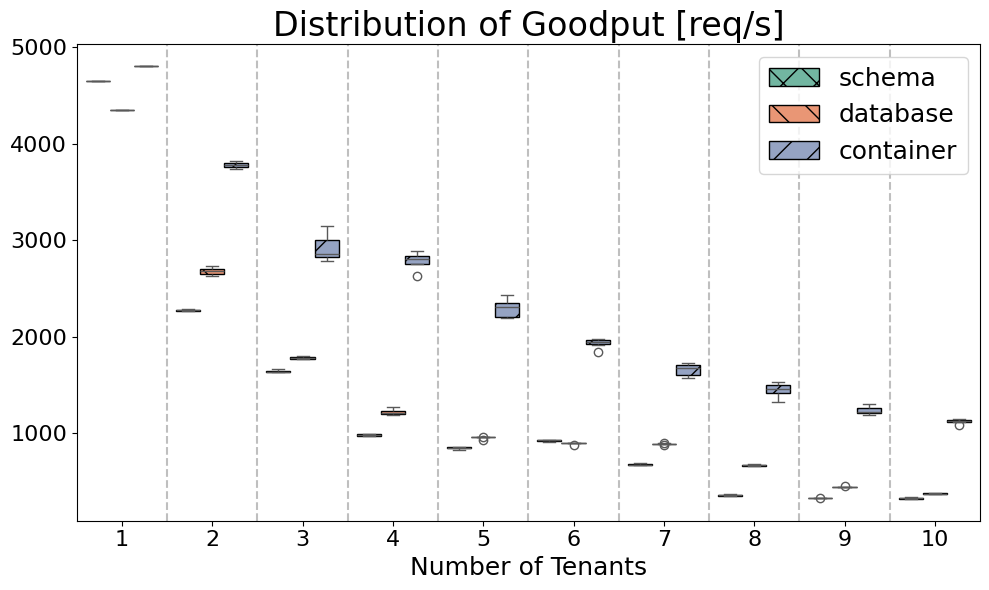

In [27]:
plot_boxplots(df, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

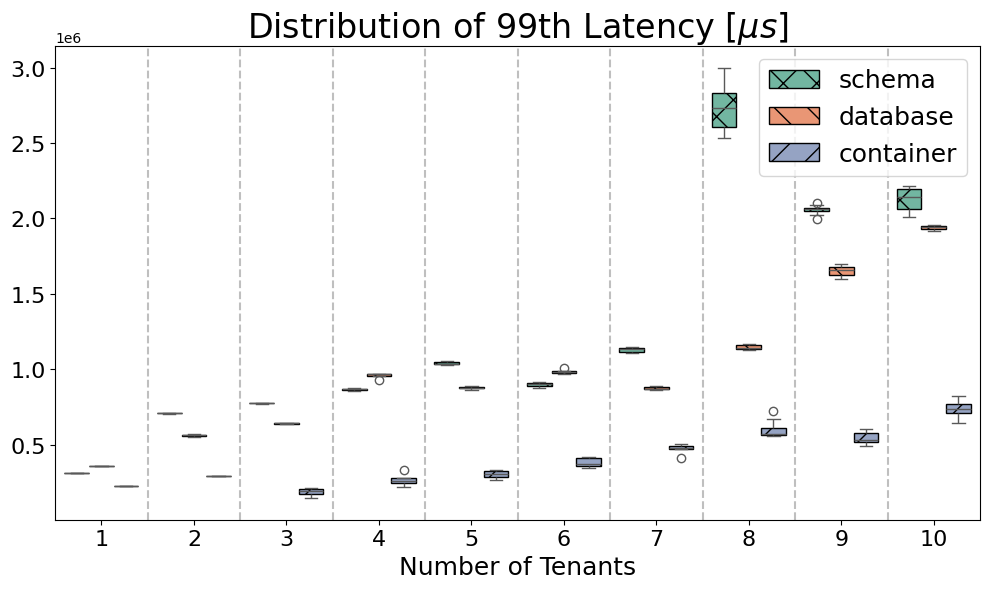

In [28]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')


## Per Total

In [29]:
df_performance = get_performance_all(codes)
df_performance = df_performance.dropna()

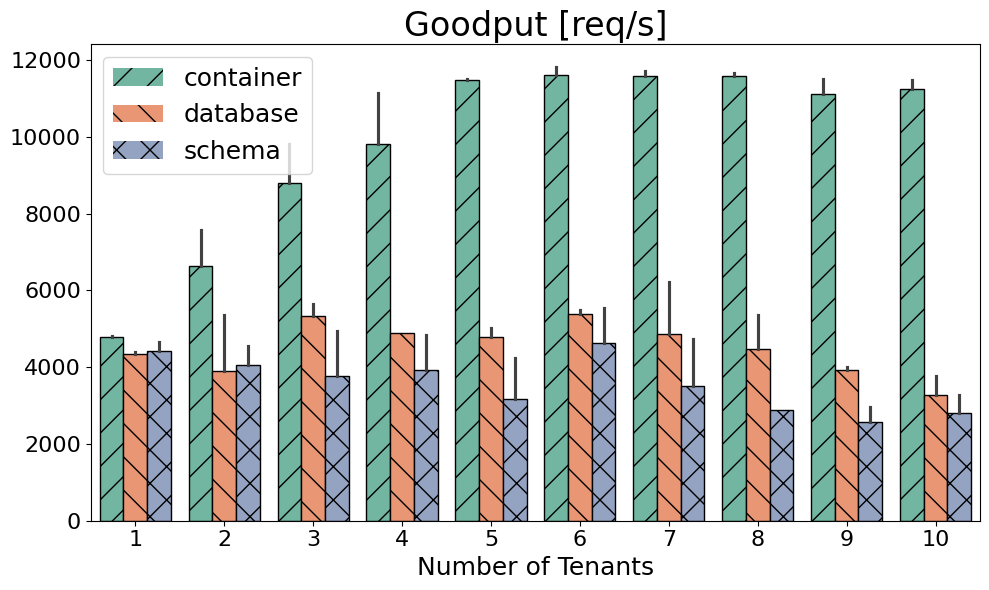

In [30]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

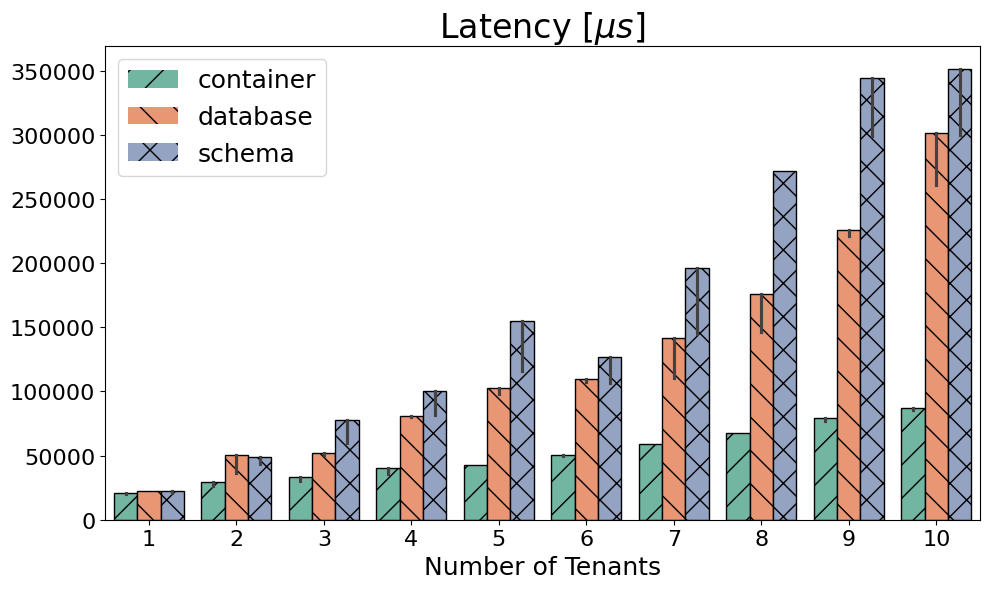

In [31]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

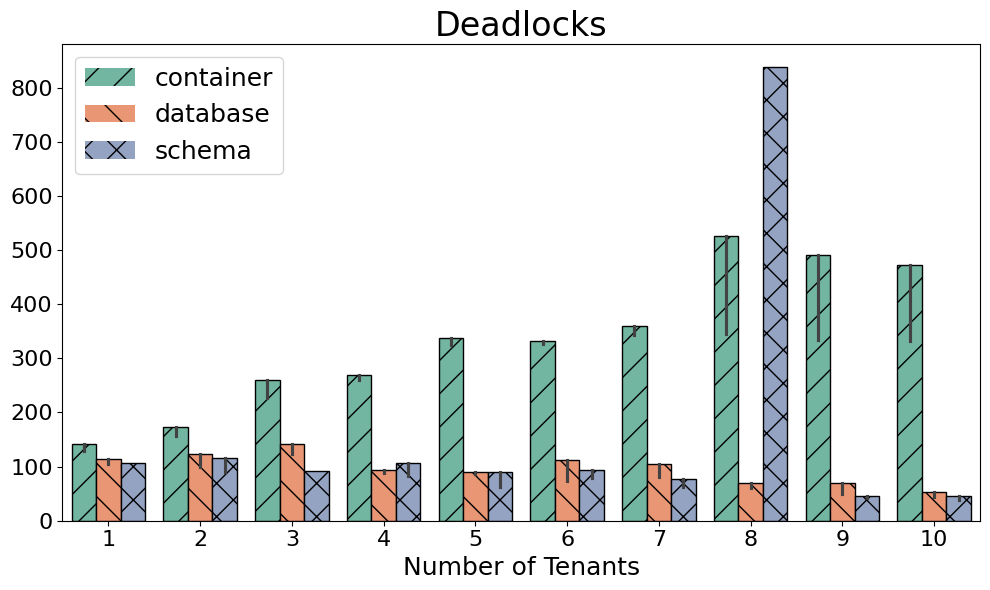

In [32]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [33]:
df_performance = get_loading_time_max_all(codes)
df_performance

,time_load,time_ingest,time_check,terminals,pods,tenant,client,datadisk,type,num_tenants
PostgreSQL-1-1-65536-1,255.0,114.0,141.0,1,1,,1,3056,schema,1
PostgreSQL-1-1-65536-2,255.0,114.0,141.0,1,1,,2,6405,schema,1
PostgreSQL-1-1-65536-1,305.0,134.0,171.0,1,1,,1,3064,database,1
PostgreSQL-1-1-65536-2,305.0,134.0,171.0,1,1,,2,5424,database,1
PostgreSQL-1-1-65536-0-1,254.0,114.0,139.0,1,1,0,1,3056,container,1
PostgreSQL-1-1-65536-0-2,254.0,114.0,139.0,1,1,0,2,5685,container,1
PostgreSQL-1-1-65536-1,539.0,243.0,295.0,1,2,,1,5065,schema,2
PostgreSQL-1-1-65536-2,539.0,243.0,295.0,1,2,,2,10103,schema,2
PostgreSQL-1-1-65536-1,440.0,205.0,234.0,1,2,,1,5080,database,2
PostgreSQL-1-1-65536-2,440.0,205.0,234.0,1,2,,2,12947,database,2


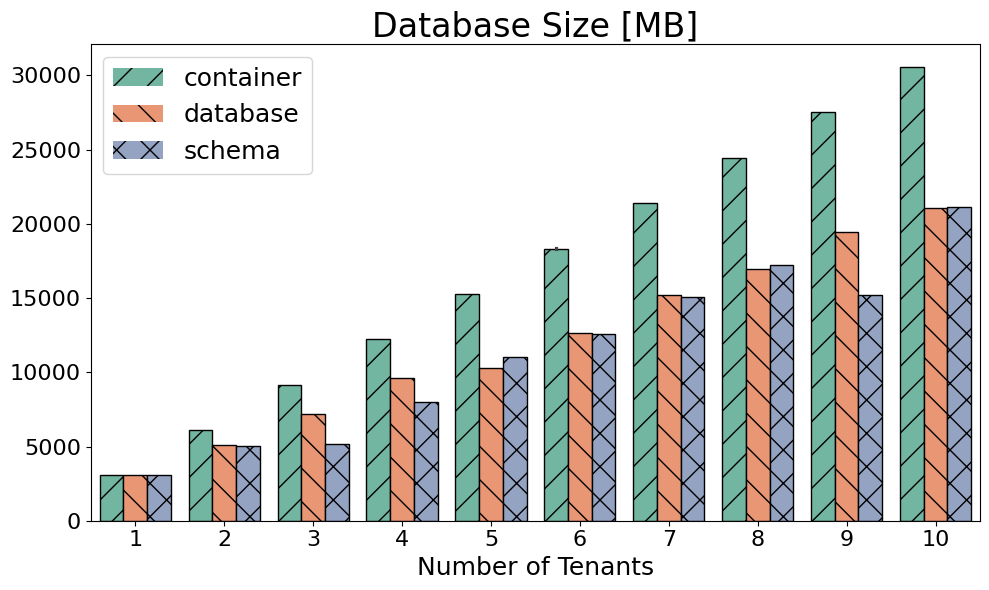

In [34]:
df_performance_first = df_performance[df_performance['client'] == '1']
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

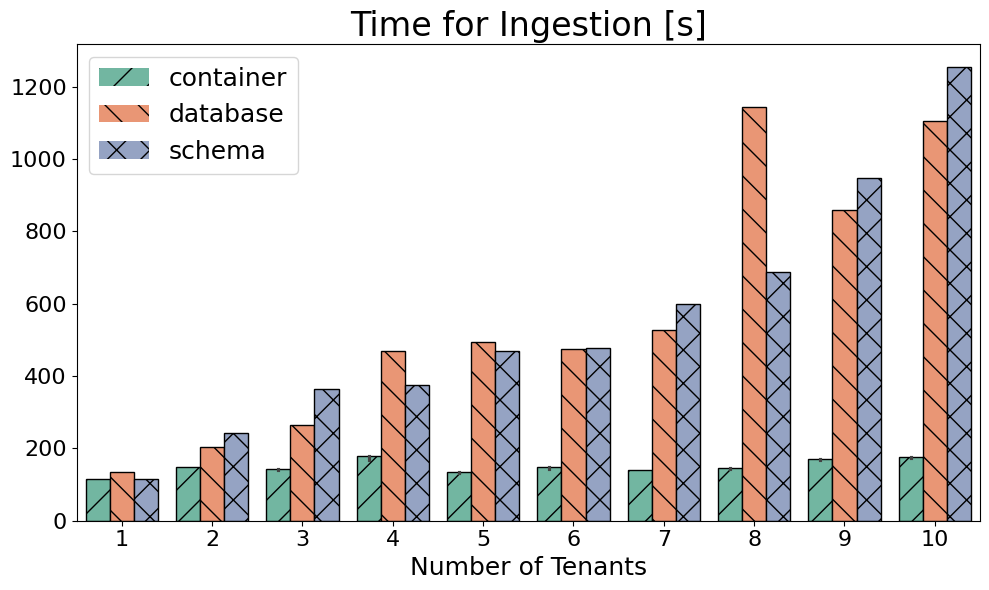

In [35]:
plot_bars(df_performance, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

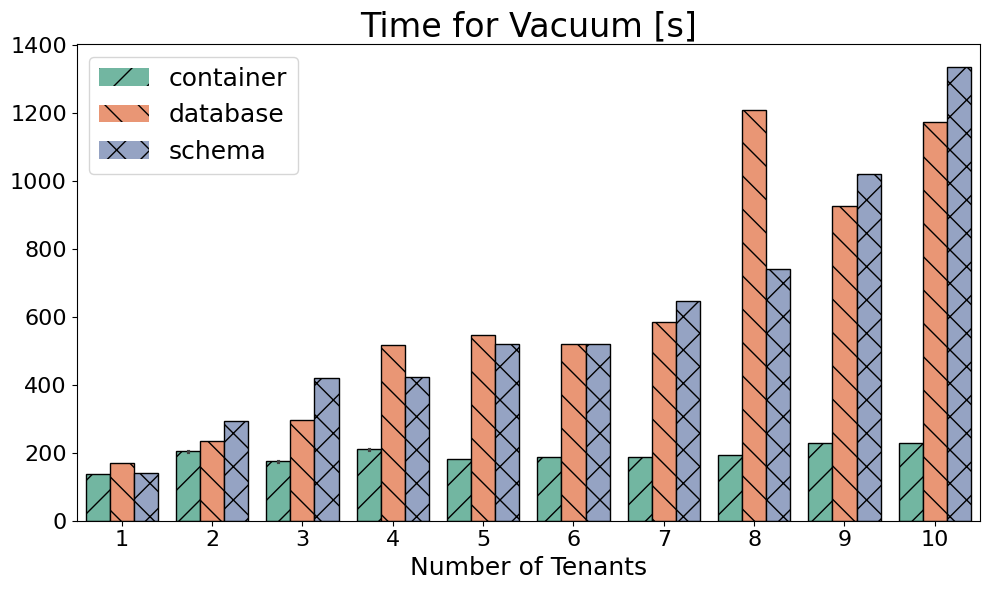

In [36]:
plot_bars(df_performance, y='time_check', title='Time for Vacuum [s]', estimator='max')

## Hardware Benchmarking

In [37]:
df_performance = get_monitoring_all(codes, type="stream")
df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Active,Idle,Transactions Idle,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,10805.14,10730164.0,22449648.0,22.59,0.0,982.78,79.50,0.98,20.68,...,43.0,28.0,434209142.0,0.0,0.0,14400.0,11200.0,100.000000,schema,1
0,1,9819.37,10349676.0,20599372.0,20.21,0.0,1004.82,90.26,1.74,24.28,...,35.0,35.0,387549315.0,0.0,0.0,14300.0,11300.0,100.000000,database,1
0,1,10252.49,10770648.0,21501984.0,19.80,0.0,1001.89,74.20,1.62,25.45,...,60.0,45.0,444880205.0,0.0,0.0,14600.0,11100.0,100.000000,container,1
0,1,10968.99,13628292.0,28978424.0,23.27,0.0,2057.04,157.23,1.90,42.35,...,75.0,65.0,395863394.0,0.0,0.0,24500.0,18800.0,100.000000,schema,2
0,1,12663.66,13872180.0,31185264.0,24.07,0.0,1998.28,175.18,5.70,60.18,...,46.0,46.0,453193949.0,0.0,0.0,27000.0,20500.0,100.000000,database,2
0,1,17190.01,19908452.0,39082748.0,31.42,0.0,2003.98,138.83,3.61,60.58,...,107.0,80.0,664372070.0,0.0,0.0,29300.0,22100.0,100.000000,container,2
0,1,12123.96,16876260.0,34290304.0,27.58,0.0,2779.37,247.83,2.84,51.08,...,44.0,35.0,443599719.0,0.0,0.0,33100.0,26500.0,100.000000,schema,3
0,1,13892.28,17255860.0,39470992.0,29.88,0.0,2709.92,281.06,9.98,66.45,...,65.0,74.0,440111202.0,0.0,0.0,34900.0,26700.0,100.000000,database,3
0,1,22695.28,28679484.0,53931164.0,51.15,0.0,2711.48,207.77,6.32,75.82,...,1636.0,91.0,906646566.0,0.0,0.0,43300.0,33800.0,94.556667,container,3
0,1,10484.06,19400532.0,38405484.0,31.42,0.0,3657.78,355.32,2.52,43.54,...,45.0,39.0,362911611.0,0.0,0.0,33400.0,27500.0,100.000000,schema,4


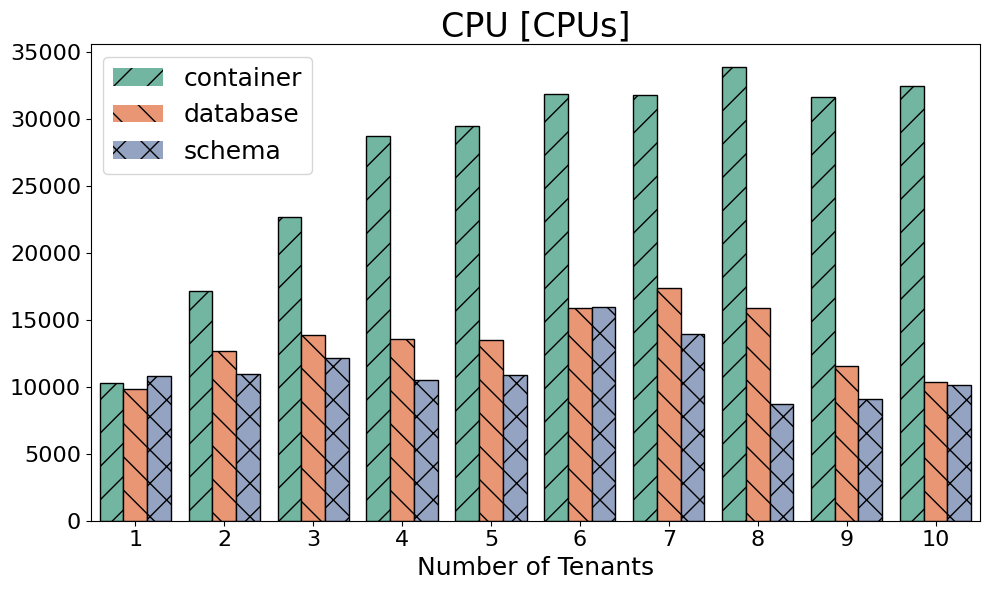

In [38]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

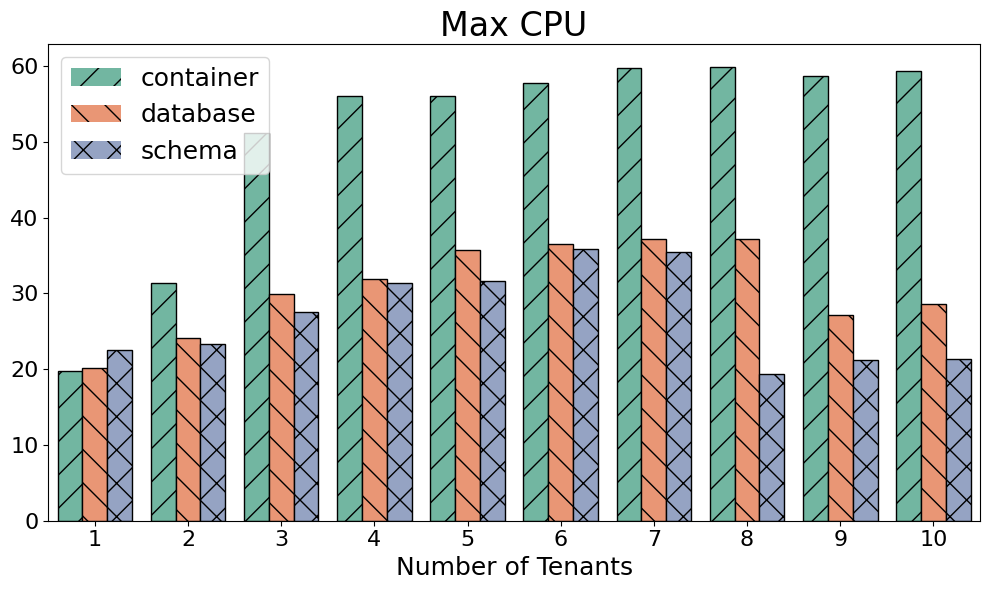

In [39]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

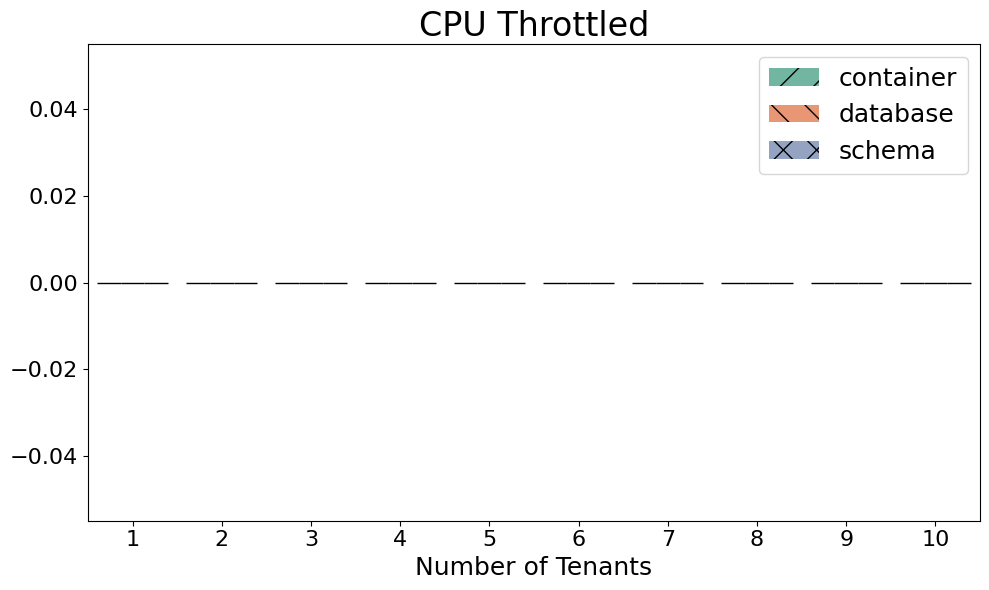

In [40]:
plot_bars(df_performance, y='CPU Throttled', title='CPU Throttled', estimator='sum')

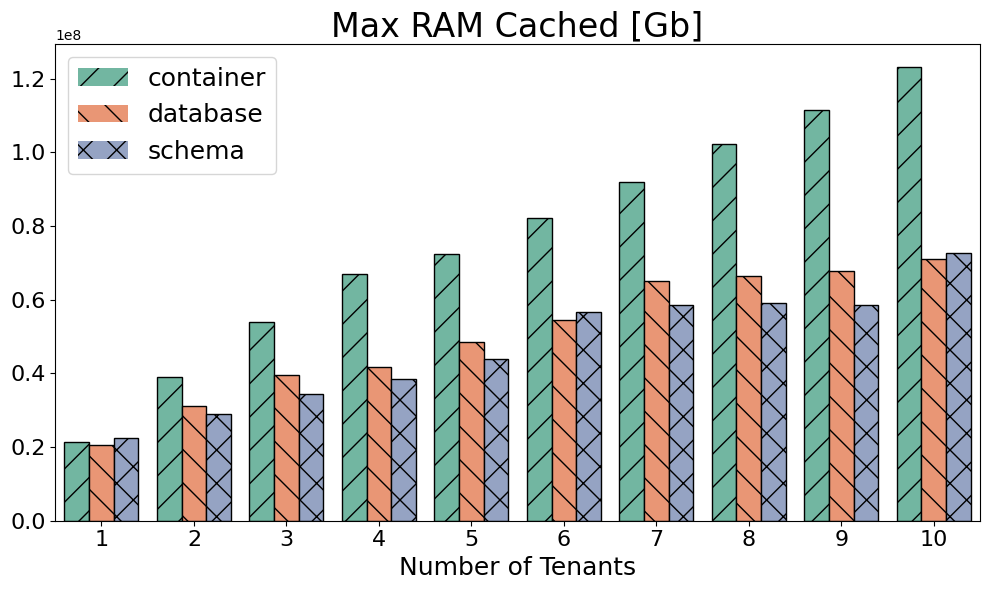

In [41]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

## Hardware Loading

In [42]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Active,Idle,Transactions Idle,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,10805.14,10730164.0,22449648.0,22.59,0.0,982.78,79.50,0.98,20.68,...,43.0,28.0,4.342091e+08,0.0,0.0,14400.0,11200.0,100.000000,schema,1
1,2,9690.51,13095664.0,25864624.0,21.79,0.0,1023.93,81.63,1.32,18.72,...,18.0,18.0,4.019194e+08,0.0,0.0,12500.0,9700.0,100.000000,schema,1
0,1,9819.37,10349676.0,20599372.0,20.21,0.0,1004.82,90.26,1.74,24.28,...,35.0,35.0,3.875493e+08,0.0,0.0,14300.0,11300.0,100.000000,database,1
1,2,9139.90,12863780.0,27182924.0,16.82,0.0,1012.65,89.93,2.03,28.37,...,21.0,21.0,4.004123e+08,0.0,0.0,12500.0,9900.0,100.000000,database,1
0,1,10252.49,10770648.0,21501984.0,19.80,0.0,1001.89,74.20,1.62,25.45,...,60.0,45.0,4.448802e+08,0.0,0.0,14600.0,11100.0,100.000000,container,1
1,2,9472.46,13278384.0,25398064.0,20.37,0.0,991.26,66.01,1.72,33.78,...,17.0,17.0,4.207788e+08,0.0,0.0,12100.0,9800.0,100.000000,container,1
0,1,10968.99,13628292.0,28978424.0,23.27,0.0,2057.04,157.23,1.90,42.35,...,75.0,65.0,3.958634e+08,0.0,0.0,24500.0,18800.0,100.000000,schema,2
1,2,8816.80,15665852.0,31676932.0,20.35,0.0,1945.52,170.58,1.70,30.04,...,20.0,20.0,3.386201e+08,0.0,0.0,19900.0,16700.0,100.000000,schema,2
0,1,12663.66,13872180.0,31185264.0,24.07,0.0,1998.28,175.18,5.70,60.18,...,46.0,46.0,4.531939e+08,0.0,0.0,27000.0,20500.0,100.000000,database,2
1,2,8457.31,16089720.0,31833088.0,22.40,0.0,1965.24,192.31,5.28,46.47,...,13.0,72.0,8.584006e+08,0.0,0.0,52300.0,41500.0,100.000000,database,2


In [43]:
#plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

In [44]:
#plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

In [45]:
#plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [46]:
client = '1'

df_performance_monitoring = get_monitoring_all(codes, type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,1,4651.953220,106,21112.000000,315305.0,schema,1,1,10805.14,10730164.0,...,28.0,434209142.0,0.0,0.0,14400.0,11200.0,100.000000,258.318905,0.066209,0.000434
1,1,4349.368288,105,22579.000000,359374.0,database,1,1,9819.37,10349676.0,...,35.0,387549315.0,0.0,0.0,14300.0,11300.0,100.000000,265.762566,0.067159,0.000420
2,1,4803.003214,129,20447.000000,227816.0,container,1,1,10252.49,10770648.0,...,45.0,444880205.0,0.0,0.0,14600.0,11100.0,100.000000,281.083125,0.069067,0.000446
3,1,4550.894645,116,43176.000000,711217.0,schema,2,1,10968.99,13628292.0,...,65.0,395863394.0,0.0,0.0,24500.0,18800.0,100.000000,248.932380,0.045951,0.000334
4,1,5358.271400,124,36668.500000,569780.0,database,2,1,12663.66,13872180.0,...,46.0,453193949.0,0.0,0.0,27000.0,20500.0,100.000000,253.873117,0.046406,0.000386
5,1,7563.367986,174,25974.000000,291077.0,container,2,1,17190.01,19908452.0,...,80.0,664372070.0,0.0,0.0,29300.0,22100.0,100.000000,263.991748,0.047325,0.000380
6,1,4931.253076,92,59806.333333,776907.0,schema,3,1,12123.96,16876260.0,...,35.0,443599719.0,0.0,0.0,33100.0,26500.0,100.000000,244.041703,0.037137,0.000292
7,1,5346.994546,124,50661.666667,645731.0,database,3,1,13892.28,17255860.0,...,74.0,440111202.0,0.0,0.0,34900.0,26700.0,100.000000,230.933780,0.037694,0.000310
8,1,8788.219632,226,33627.333333,214701.0,container,3,1,22695.28,28679484.0,...,91.0,906646566.0,0.0,0.0,43300.0,33800.0,94.556667,232.336053,0.036198,0.000306
9,1,3928.136529,82,100158.250000,873233.0,schema,4,1,10484.06,19400532.0,...,39.0,362911611.0,0.0,0.0,33400.0,27500.0,100.000000,224.806222,0.030860,0.000202


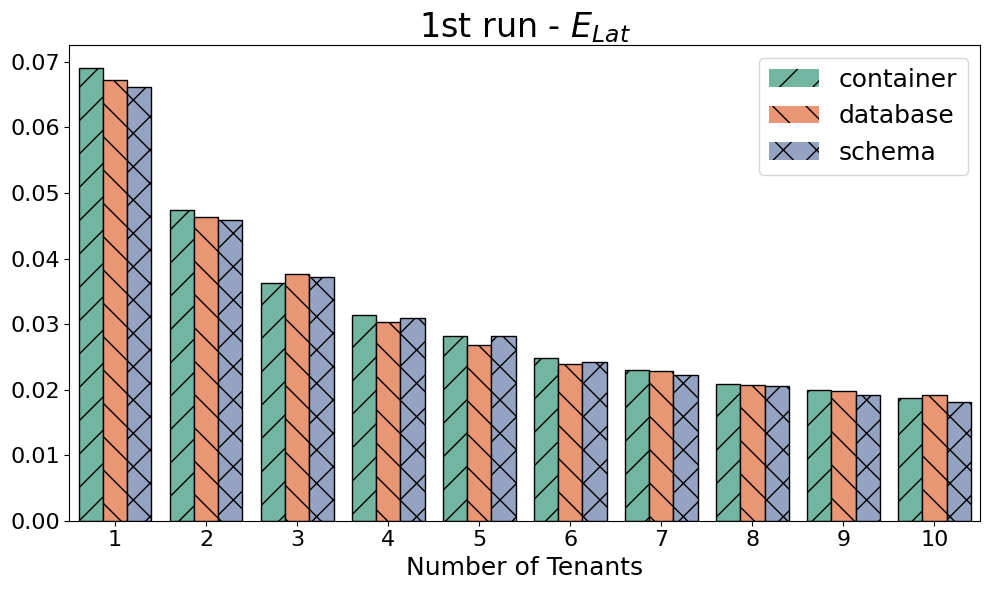

In [47]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [48]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

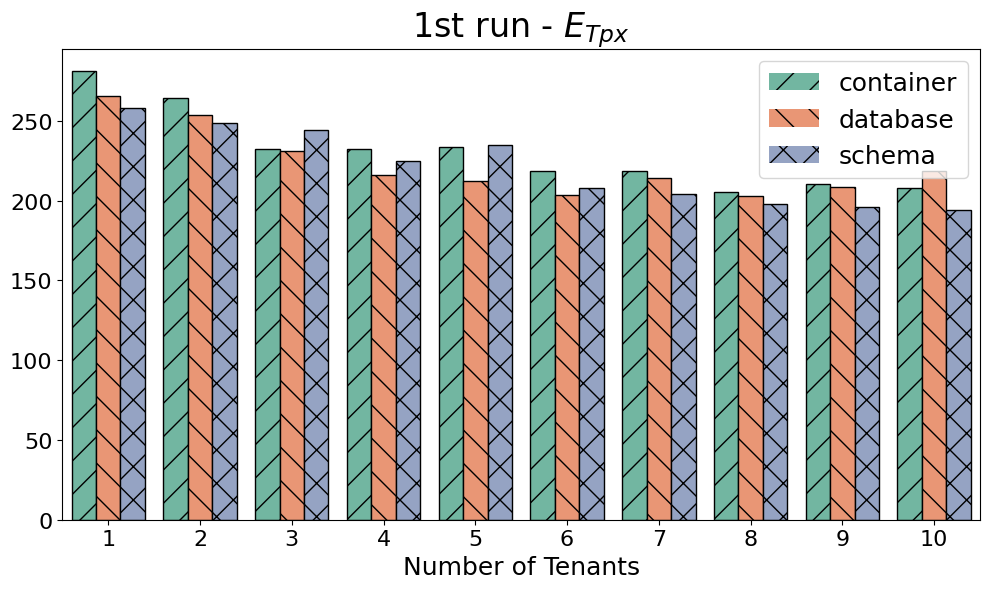

In [49]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

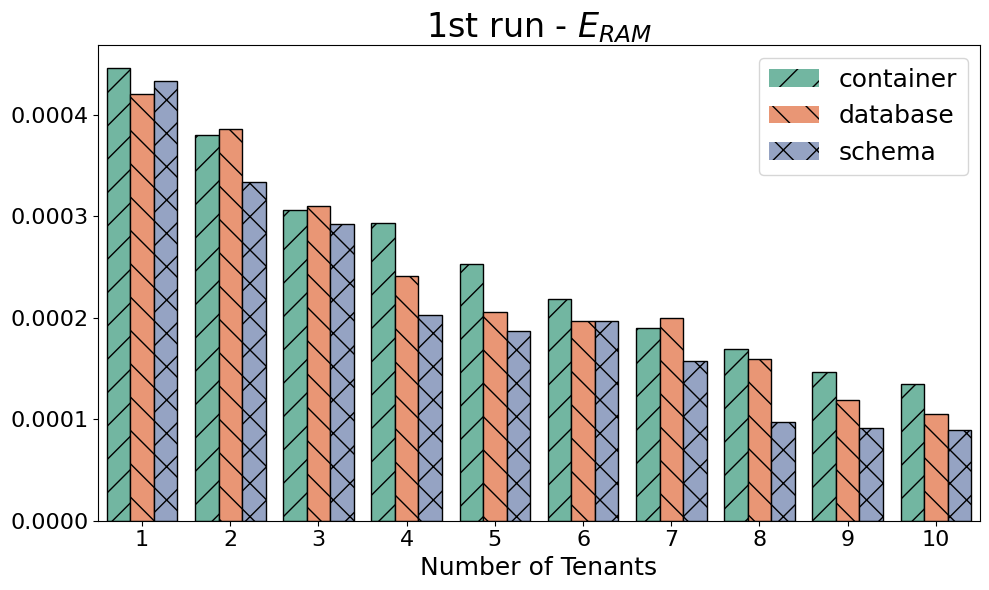

In [50]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [51]:
client = '2'

df_performance_monitoring = get_monitoring_all(codes, type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,2,4423.826299,106,22195.000000,349270.0,schema,1,2,9690.51,13095664.0,...,18.0,4.019194e+08,0.0,0.0,12500.0,9700.0,100.000000,273.906717,0.068187,0.000338
1,2,4401.014906,114,22306.000000,333160.0,database,1,2,9139.90,12863780.0,...,21.0,4.004123e+08,0.0,0.0,12500.0,9900.0,100.000000,288.910048,0.070036,0.000342
2,2,4775.036305,141,20555.000000,223895.0,container,1,2,9472.46,13278384.0,...,17.0,4.207788e+08,0.0,0.0,12100.0,9800.0,100.000000,302.458050,0.071665,0.000360
3,2,4048.093120,90,48558.000000,904766.0,schema,2,2,8816.80,15665852.0,...,20.0,3.386201e+08,0.0,0.0,19900.0,16700.0,100.000000,275.480432,0.048330,0.000258
4,2,3898.443027,99,50412.000000,733821.0,database,2,2,8457.31,16089720.0,...,72.0,8.584006e+08,0.0,0.0,52300.0,41500.0,100.000000,276.573262,0.048430,0.000242
5,2,6627.066247,157,29624.000000,293306.0,container,2,2,14738.99,23692076.0,...,144.0,1.339671e+09,0.0,0.0,55500.0,43000.0,93.465000,269.776949,0.047857,0.000280
6,2,3782.338173,91,77926.666667,873070.0,schema,3,2,9907.10,19231800.0,...,79.0,9.127039e+08,0.0,0.0,68900.0,57400.0,93.430000,229.068335,0.035990,0.000197
7,2,5650.743088,142,52170.333333,681606.0,database,3,2,13861.99,20893636.0,...,20.0,4.723568e+08,0.0,0.0,32700.0,25600.0,100.000000,244.585796,0.037186,0.000270
8,2,9826.306479,259,29993.333333,204344.0,container,3,2,22120.61,34009860.0,...,36.0,8.515651e+08,0.0,0.0,37300.0,28500.0,100.000000,266.528992,0.038823,0.000289
9,2,4830.199691,107,81463.750000,901785.0,schema,4,2,11945.45,22953696.0,...,16.0,4.267220e+08,0.0,0.0,35500.0,29900.0,100.000000,242.612862,0.032057,0.000210


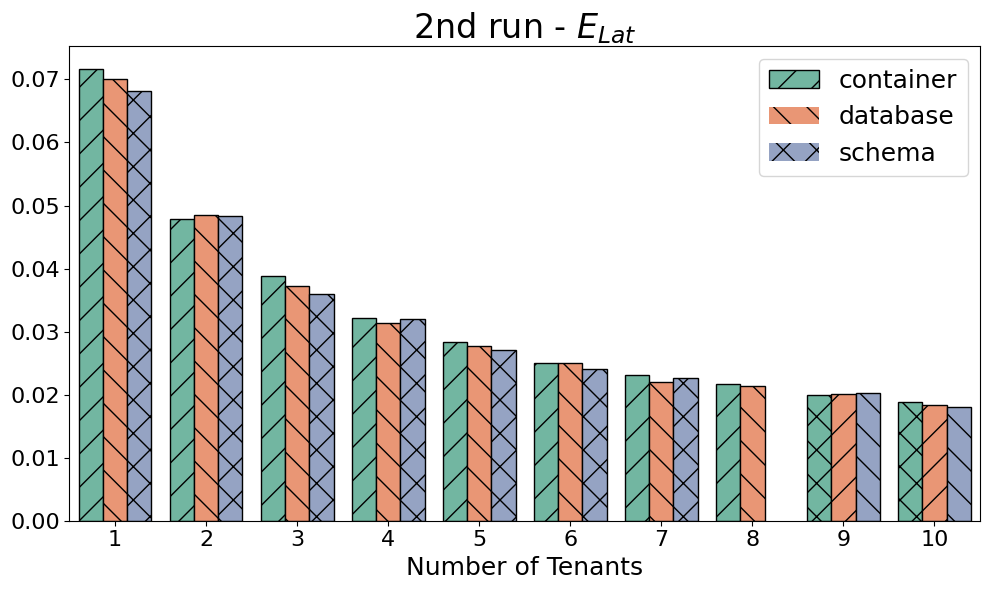

In [52]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

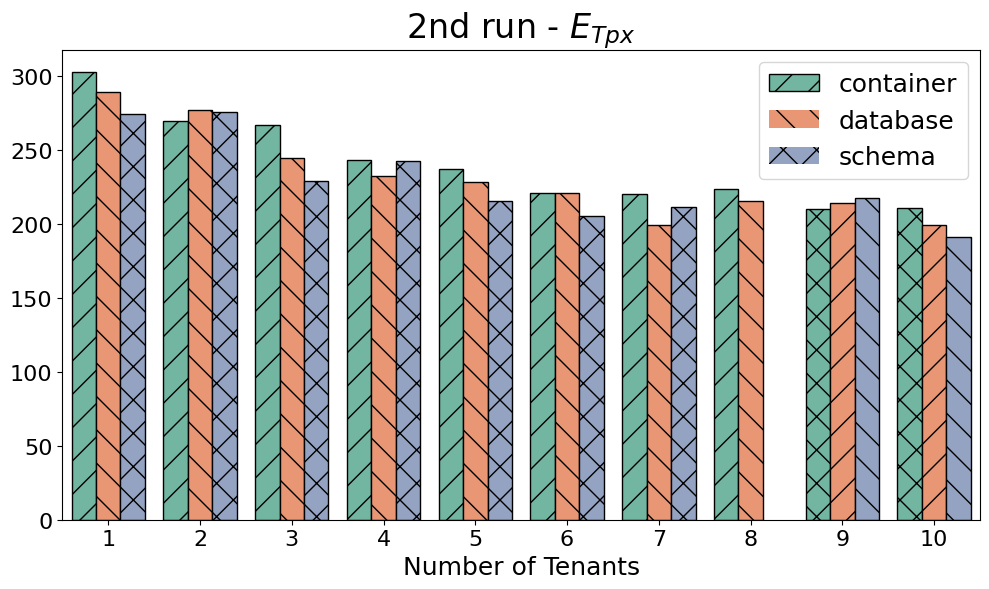

In [53]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

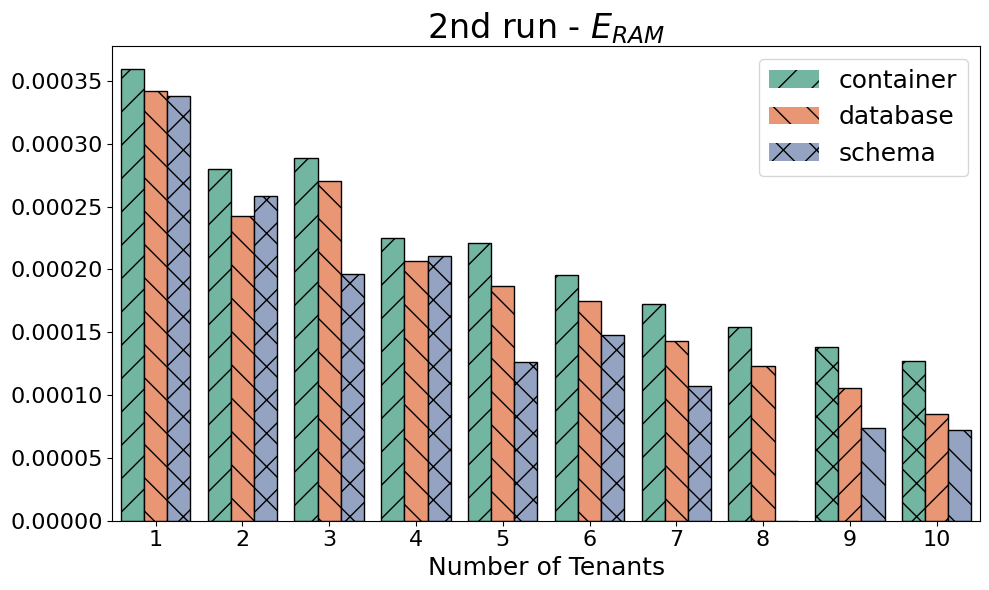

In [54]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [55]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [55]:
#zip_all_results()